In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
import seaborn as sns

In [30]:
# leeyendo data set
df = pd.read_csv('countries-aggregated.csv')

# transformando columna 'Date' de str a datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d') )

# filtrando df a solo datos de Colombia
df_colombia = df[ df['Country'] == 'Colombia' ]

# filtrando df_colombia a datos a partir de marzo 2020
df_colombia = df_colombia[ df_colombia['Date'] > datetime.strptime('2020-03-01', '%Y-%m-%d') ].drop("Country", axis=1)
df_colombia.shape

(28, 4)

In [31]:
df_colombia.tail()

,Date,Confirmed,Recovered,Deaths
11186,2020-03-25,470,8,4
11363,2020-03-26,491,8,6
11540,2020-03-27,539,10,6
11717,2020-03-28,608,10,6
11894,2020-03-29,702,10,10


In [33]:
df_colombia_melt = df_colombia.melt('Date', var_name='cols',  value_name='vals')

In [34]:
df_colombia_melt

,Date,cols,vals
0,2020-03-02,Confirmed,0
1,2020-03-03,Confirmed,0
2,2020-03-04,Confirmed,0
3,2020-03-05,Confirmed,0
4,2020-03-06,Confirmed,1
...,...,...,...
79,2020-03-25,Deaths,4
80,2020-03-26,Deaths,6
81,2020-03-27,Deaths,6
82,2020-03-28,Deaths,6


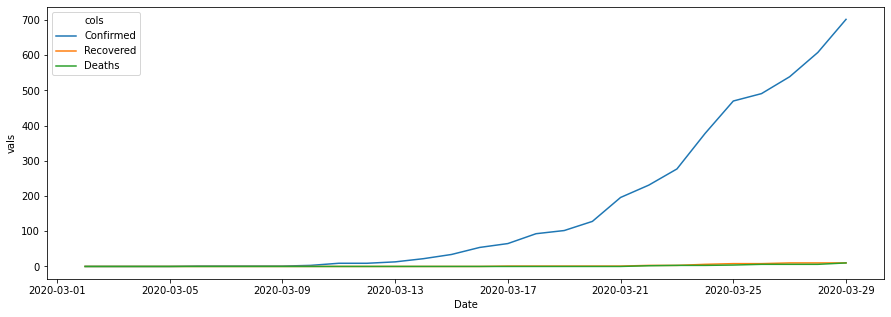

In [38]:
# visualizando datos a traves del tiempo
plt.figure(figsize=(15,5))
ax = sns.lineplot(x="Date", y="vals", hue="cols", data= df_colombia_melt)
# plot = df_tiempo[['Confirmed', 'Recovered', 'Deaths']].plot(figsize=(20, 10))
# legend = plt.legend()
# legend.prop.set_size(14)

In [39]:
# definir conjunto de datos
df_tiempo = df_colombia.set_index('Date')
x = df_tiempo['Confirmed']

# instanciar modelo
sarima_model = SARIMAX(x, order=(2,3,1), freq='D', seasonal_order=(0,0,0,0))

# ajustar modelo
results = sarima_model.fit()

# mirar el AIC
results.aic

/home/davinchi/Documents/covid19/tarea1/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/davinchi/Documents/covid19/tarea1/venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


229.941879872241

In [40]:
prediccion = results.get_forecast(steps=21).predicted_mean
prediccion

2020-03-30     783.208947
2020-03-31     859.310003
2020-04-01     949.700904
2020-04-02    1044.919228
2020-04-03    1136.461418
2020-04-04    1231.929966
2020-04-05    1334.143109
2020-04-06    1438.049558
2020-04-07    1543.381890
2020-04-08    1653.073690
2020-04-09    1766.504122
2020-04-10    1882.173838
2020-04-11    2000.829522
2020-04-12    2123.124430
2020-04-13    2248.463324
2020-04-14    2376.632651
2020-04-15    2508.026035
2020-04-16    2642.660878
2020-04-17    2780.309486
2020-04-18    2921.021946
2020-04-19    3064.914132
Freq: D, dtype: float64

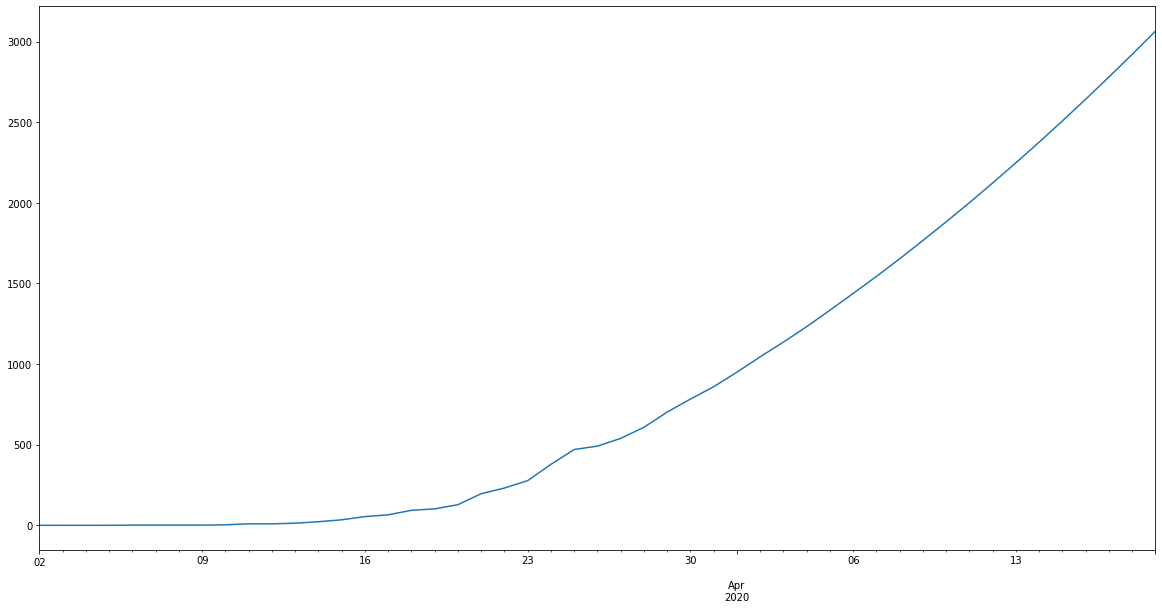

In [41]:
df_final = pd.concat([df_tiempo['Confirmed'], prediccion])
df_final.plot(figsize=(20, 10))